# Lesson 5: Classification

Key Ideas:
+ Finding patterns and making predictions about categorical variables
    + Overview of the iterative modeling process
    + Splitting the dataset into a training set and a validation/testing set
    + Finding patterns in the data, using the training set
+ Creating simple decision tree classifiers based on patterns observed in data
+ Assessing, comparing, and improving models

## 1. Finding patterns and making predictions about categorical variables

Recall the math modeling process:
+ Step 1: Find patterns in data
+ Step 2: Build a model that fits the data relatively well  (e.g., fit a line through the plotted data points)
+ Step 3: Assess the model
+ Step 4: Repeat, until we have a model that represents the real world process sufficiently well
+ Step 5: Use the model to make predictions/decisions

In Lesson 3, (1) we found a pattern in the `geyser` data by visualizing the data points in a scatterplot.  (2) From the visualization, and by computing the correlation coefficient between 'duration' and 'waiting', we determine that a line is a reasonable type of model.  We then find a line of best fit (one that minimizes MSE).  Assuming that this model is reasonable, we can use the model to predict when the next eruption will take place, given the duration of an eruption that just took place.

In the above example, the quantity that we want to predict is 'waiting', the number of minutes until the next eruption, which is a numerical variable.  


Next, we will see an example of models for preciting a categorical variable.  This type of question is called a classification question.  Here are some examples of classification tasks:
+ Classifying an email as spam or not spam
+ Given an image/photograph of an animal, determine the animal's species
+ Given an image of a handwritten letter, determine what letter it is
+ Given a song, determine its genre
+ Given an activity on a website, determine if it is human or a bot
+ etc.

A binary classification task is one that involves only two possible categories (for example, human vs. bot, or spam vs. not spam).  To keep things simpler, we will focus our attention only on binary classification tasks.



***Example***

The dataset below consists of information about 699 tumor samples.  In addition to the 'id' column, there are nine variables that describes various aspects of each sample.  These variables are discrete numerical variables, and could be thought of as either numerical or categorical.  The 'class' column takes on two values: 2 (indicating that the tumor is benign) and 4 (indicating that the tumor is malignant).

Using this dataset, our goal is to create a model that allows us to predict whether a tumor sample is benign or malignant, based the values of the nine variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
cancerdata = pd.read_csv('cancerdata.csv')
cancerdata

id  clump_thickness  uniformity_cellsize  uniformity_cellshape  \
0    1000025                5                    1                     1   
1    1002945                5                    4                     4   
2    1015425                3                    1                     1   
3    1016277                6                    8                     8   
4    1017023                4                    1                     1   
..       ...              ...                  ...                   ...   
694   776715                3                    1                     1   
695   841769                2                    1                     1   
696   888820                5                   10                    10   
697   897471                4                    8                     6   
698   897471                4                    8                     8   

     marginal_adhesion  epithelial_cellsize bare_nuclei  bland_chromatin  \
0                    1                    2           1                3   
1                    5                    7          10                3   
2                    1                    2           2                3   
3                    1                    3           4                3   
4                    3                    2           1                3   
..                 ...                  ...         ...              ...   
694                  1                    3           2                1   
695                  1                    2           1                1   
696                  3                    7           3                8   
697                  4                    3           4               10   
698                  5                    4           5               10   

     normal_nucleoli  mitoses  class  
0                  1        1      2  
1                  2        1      2  
2                  1        1      2  
3                  7        1      2  
4                  1        1      2  
..               ...      ...    ...  
694                1        1      2  
695                1        1      2  
696               10        2      4  
697                6        1      4  
698                4        1      4  

[699 rows x 11 columns]

### Splitting the dataset into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

X = cancerdata.iloc[ : , 0:10 ]
Y = cancerdata['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

id  clump_thickness  uniformity_cellsize  uniformity_cellshape  \
584  1217717                5                    1                     1   
417  1239967                1                    1                     1   
606   353098                4                    1                     1   
349   832567                4                    2                     3   
134  1180831                3                    1                     1   

     marginal_adhesion  epithelial_cellsize bare_nuclei  bland_chromatin  \
584                  6                    3           1                1   
417                  1                    2           1                2   
606                  2                    2           1                1   
349                  5                    3           8                7   
134                  1                    3           1                2   

     normal_nucleoli  mitoses  
584                1        1  
417                1        1  
606                1        1  
349                6        1  
134                1        1

In [11]:
X_train.shape

(489, 10)

In [12]:
X_test.shape

(210, 10)

### Finding Patterns in Data

Investigate the training dataset to see patterns in the data.  For example, we can start by grouping the rows (the samples) based on whether the sample is benign or malignant (according to the 'class' column), then computing the average value of the nine variables, for each class.

Running the code cell below, we see that for a lot of the variables, the averages are smaller among the class-2 rows than the averages among the class-4 rows.  So, we see the pattern that the higher the variable values are, the more likely it is that the sample is that of a malignant tumor.

In [20]:
cancerdata.groupby('class').agg( 'mean')

id  clump_thickness  uniformity_cellsize  \
class                                                       
2      1.107591e+06         2.956332             1.325328   
4      1.003505e+06         7.195021             6.572614   

       uniformity_cellshape  marginal_adhesion  epithelial_cellsize  \
class                                                                 
2                  1.443231           1.364629             2.120087   
4                  6.560166           5.547718             5.298755   

       bland_chromatin  normal_nucleoli   mitoses  
class                                              
2             2.100437         1.290393  1.063319  
4             5.979253         5.863071  2.589212

We cannot create a scatterplot with all nine variables, but we can create one with pairs of variables, and coloring each point based on whether the point corresponds to a benign or malignant sample.

The scatterplot below tells us that samples whose clump_thickness value is 6 or less and whose uniformity_cellsize value is 4 or less seem to be mostly benign (class 2).  Points outside of this region seems to correspond mostly to malignant samples.

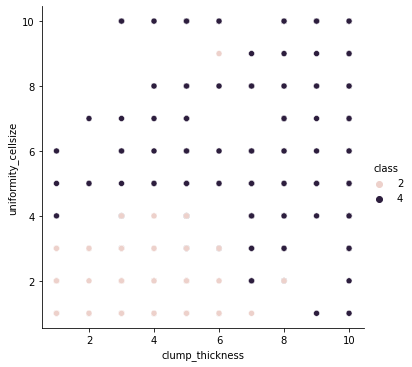

In [28]:
sns.relplot( data = cancerdata , x = 'clump_thickness', y = 'uniformity_cellsize' , hue = 'class' )

## 2. Creating simple decision tree classifiers based on patterns observed in data

With just the above observations, we can create a simple classification model, based only on two variables: the uniformity_cellsize and clump_thickness values.

+ If clump_thickness is less than or equal to 6,
    + If uniformity_cellsize is less than or equal to 4, then predict the class to be 2 (benign)
    + Otherwise (that is, clump_thickness is <= 6 but uniformity_cellsize > 4), then predict the class to be 4 (malignant)
+ Otherwise (if clump_thickness is > 6, regardless of what unifromity_cellsize is), then predict the class to be 4 (malignant)

We can implement this model as a nested if-else statement:

In [31]:
clump_thickness = 7      # experiment and change this value
uniformity_cellsize = 2  # experiment and change this value


if clump_thickness <= 6 :
    if uniformity_cellsize <= 4:
        predicted_class = 2
    else:
        predicted_class = 4
else:
    predicted_class = 4

print(predicted_class)  # display the predited class

4


We can further define a function, perhaps called `predict_cancer_class()` 
+ whose inputs are clump thickness and uniformity of cell size value.  
+ The action done by this function is the sequence of decision implemented by the above nested if-else statement.  
+ The output of the function is the predicted class.

In [34]:
# define the function
def predict_cancer_class( clump_thickness, predicted_class ):
    if clump_thickness <= 6 :
        if uniformity_cellsize <= 4:
            predicted_class = 2
        else:
            predicted_class = 4
    else:
        predicted_class = 4
        
    return( predicted_class )

In [37]:
# check that the function works

sample_clump_thickness = 7      # experiment and change this value
sample_uniformity_cellsize = 2  # experiment and change this value

predict_cancer_class( sample_clump_thickness ,  sample_uniformity_cellsize )

4

In [36]:
# check that the function works, example 2

sample_clump_thickness = 2      # experiment and change this value
sample_uniformity_cellsize = 3  # experiment and change this value

predicted_class_for_this_sample = predict_cancer_class( sample_clump_thickness ,  sample_uniformity_cellsize )

print( predicted_class_for_this_sample )

2


## 3. Assessing, comparing, and improving models




## Lesson 5 Exercises